<a href="https://colab.research.google.com/github/Dcodinginsane/Pandas-for-Data-Analysis/blob/main/Nyc_flights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [2]:
flight_data=pd.read_csv("/content/nyc_flights.csv")
flight_data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400.00,5.00,15.00,2013-01-01T10:00:00Z
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416.00,5.00,29.00,2013-01-01T10:00:00Z
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089.00,5.00,40.00,2013-01-01T10:00:00Z
3,2013,1,1,544.00,545,-1.00,1004.00,1022,-18.00,B6,725,N804JB,JFK,BQN,183.00,1576.00,5.00,45.00,2013-01-01T10:00:00Z
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,461,N668DN,LGA,ATL,116.00,762.00,6.00,0.00,2013-01-01T11:00:00Z


In [3]:
df_summary = flight_data.describe()
df_summary

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,67984.00,67984.00,67984.00,67116.00,67984.00,67116.00,67078.00,67984.00,66965.00,67984.00,66964.00,67983.00,67983.00,67983.00
mean,2013.00,6.60,14.41,1342.77,1338.39,7.41,1522.28,1542.99,2.36,1982.56,151.87,1027.39,13.13,25.81
std,0.00,4.56,8.96,476.83,463.88,31.90,508.24,484.35,35.52,1636.27,94.56,728.66,4.63,19.42
min,2013.00,1.00,1.00,1.00,500.00,-32.00,1.00,1.00,-70.00,1.00,20.00,80.00,5.00,0.00
25%,2013.00,1.00,7.00,905.00,902.00,-6.00,1116.00,1128.00,-16.00,525.00,83.00,502.00,9.00,6.00
50%,2013.00,10.00,13.00,1356.00,1355.00,-2.00,1549.00,1600.00,-5.00,1505.00,131.00,828.00,13.00,29.00
75%,2013.00,10.00,22.00,1734.00,1725.00,5.00,1942.00,1945.00,9.00,3493.00,193.00,1389.00,17.00,43.00
max,2013.00,11.00,31.00,2400.00,2359.00,1301.00,2400.00,2359.00,1272.00,8500.00,676.00,4983.00,23.00,59.00


In [4]:
flight_data['DATE'] = pd.to_datetime(flight_data[['year','month','day']], yearfirst=True)

# 2. Month name
month_dict={
    1:  '01- January',
    2:  '02- February',
    3:  '03- March',
    4:  '04- April',
    5:  '05- May',
    6:  '06- June',
    7:  '07- July',
    8:  '08- August',
    9:  '09- September',
    10: '10- October',
    11: '11- November',
    12: '12- December'
}
flight_data['MONTH_desc'] = flight_data['month'].apply(lambda m: month_dict[m])

flight_data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,...,N14228,EWR,IAH,227.00,1400.00,5.00,15.00,2013-01-01T10:00:00Z,2013-01-01,01- January
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,...,N24211,LGA,IAH,227.00,1416.00,5.00,29.00,2013-01-01T10:00:00Z,2013-01-01,01- January
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,...,N619AA,JFK,MIA,160.00,1089.00,5.00,40.00,2013-01-01T10:00:00Z,2013-01-01,01- January
3,2013,1,1,544.00,545,-1.00,1004.00,1022,-18.00,B6,...,N804JB,JFK,BQN,183.00,1576.00,5.00,45.00,2013-01-01T10:00:00Z,2013-01-01,01- January
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,...,N668DN,LGA,ATL,116.00,762.00,6.00,0.00,2013-01-01T11:00:00Z,2013-01-01,01- January


In [5]:
rows,cols = flight_data.shape
print("Number of rows: ", rows)
print("Number of columns: ", cols)

Number of rows:  67984
Number of columns:  21


In [6]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67984 entries, 0 to 67983
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            67984 non-null  int64         
 1   month           67984 non-null  int64         
 2   day             67984 non-null  int64         
 3   dep_time        67116 non-null  float64       
 4   sched_dep_time  67984 non-null  int64         
 5   dep_delay       67116 non-null  float64       
 6   arr_time        67078 non-null  float64       
 7   sched_arr_time  67984 non-null  int64         
 8   arr_delay       66965 non-null  float64       
 9   carrier         67984 non-null  object        
 10  flight          67984 non-null  int64         
 11  tailnum         67714 non-null  object        
 12  origin          67983 non-null  object        
 13  dest            67983 non-null  object        
 14  air_time        66964 non-null  float64       
 15  di

In [7]:
flt_data_copy= flight_data.dropna()
flt_data_copy.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,...,N14228,EWR,IAH,227.00,1400.00,5.00,15.00,2013-01-01T10:00:00Z,2013-01-01,01- January
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,...,N24211,LGA,IAH,227.00,1416.00,5.00,29.00,2013-01-01T10:00:00Z,2013-01-01,01- January
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,...,N619AA,JFK,MIA,160.00,1089.00,5.00,40.00,2013-01-01T10:00:00Z,2013-01-01,01- January
3,2013,1,1,544.00,545,-1.00,1004.00,1022,-18.00,B6,...,N804JB,JFK,BQN,183.00,1576.00,5.00,45.00,2013-01-01T10:00:00Z,2013-01-01,01- January
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,...,N668DN,LGA,ATL,116.00,762.00,6.00,0.00,2013-01-01T11:00:00Z,2013-01-01,01- January


Problem Statement _ Airport & Airline flight Information

In [8]:
carrier_count = flight_data['carrier'].value_counts()
carrier_count

UA    11878
EV    11086
B6    10602
DL     9492
AA     6648
MQ     5414
US     4231
9E     3962
WN     2545
VX      983
FL      653
AS      146
F9      143
YV      135
HA       63
OO        3
Name: carrier, dtype: int64

TypeError: countplot() got multiple values for argument 'data'

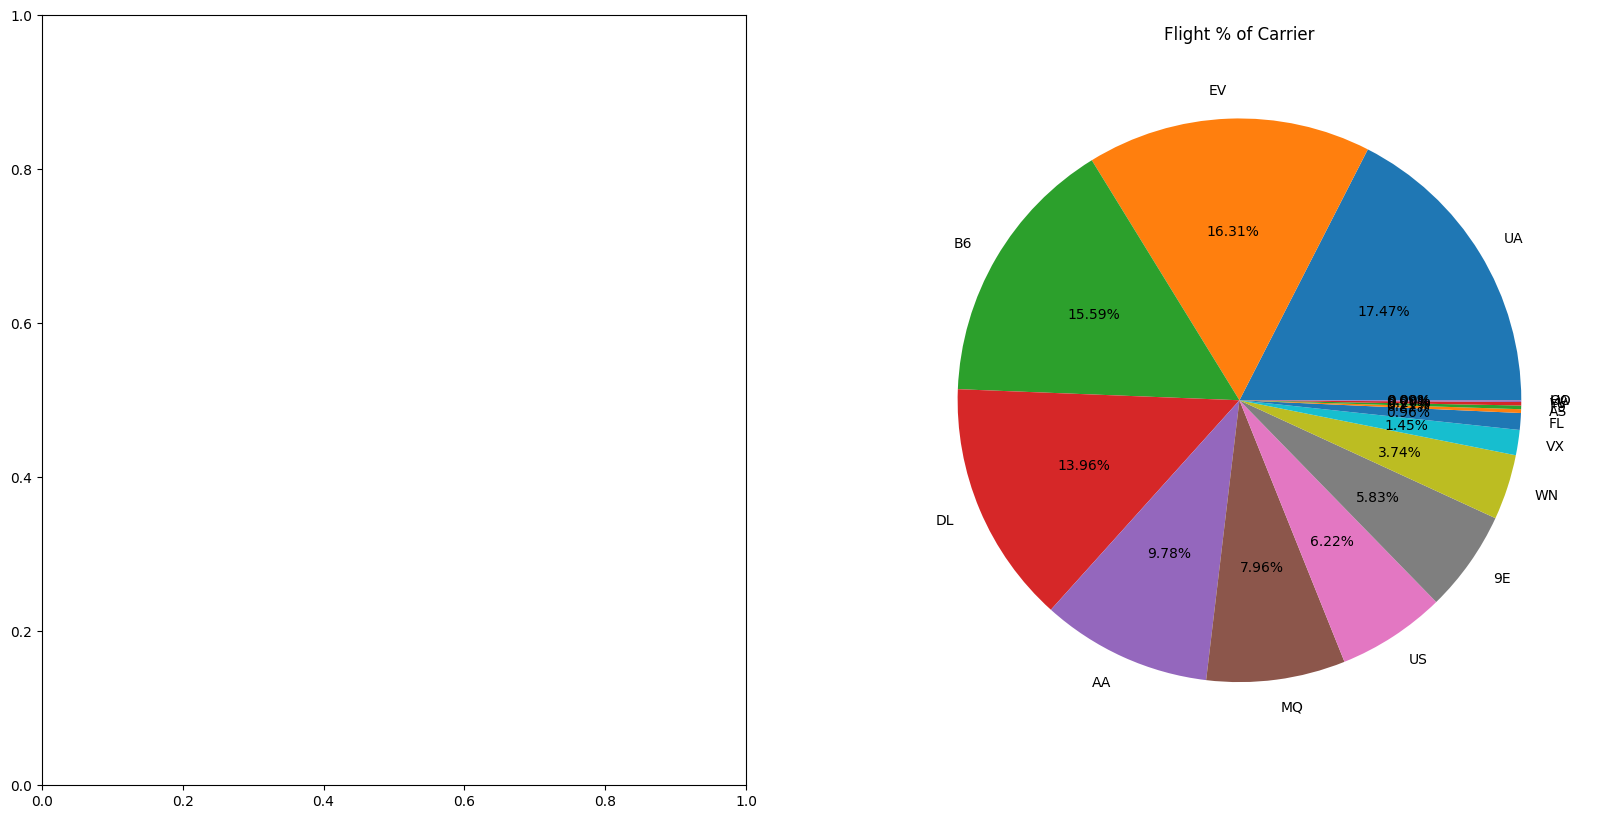

In [9]:
#Graphical representation of carriers scheduled flights in numbers and %

f,ax=plt.subplots(1,2,figsize=(20,10))
flight_data['carrier'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)
ax[1].set_title('Flight % of Carrier')
ax[1].set_ylabel('')
sns.countplot('carrier',order = flight_data['carrier'].value_counts().index, data=flight_data,ax=ax[0])
ax[0].set_title('Frequency Distribution of Carriers')
ax[0].set_ylabel('Number of Flights')
plt.show()

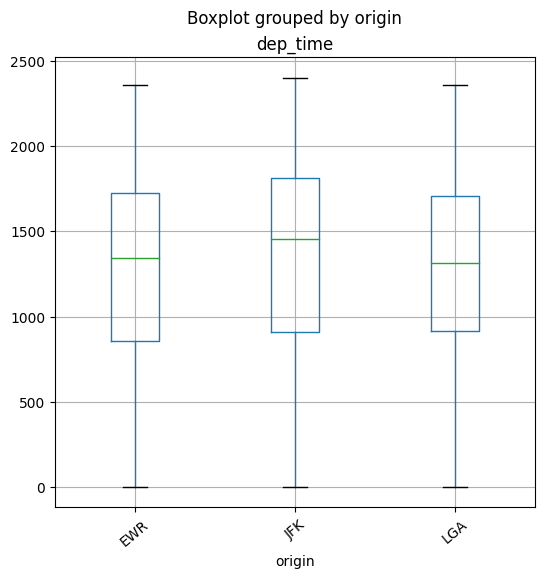

The highest IQ range (900 to 1800) is for JFK, where 75% flights are falling under the departure time of 1800 and middle data point for departure is 1500 


In [10]:
#1 Overall pattern of departure time from NYC airports

flt_data_copy.boxplot('dep_time','origin', rot = 40, figsize=(6,6))

plt.show()

print("The highest IQ range (900 to 1800) is for JFK, where 75% flights are falling under the departure time of 1800 and middle data point for departure is 1500 ")

In [11]:
# Number of scheduled departure from different origin

allflight_NYC=flt_data_copy['dest'].unique()
allflightcount_NYC=len(allflight_NYC)      # Total number of destination is 104
print("The total number of destination flight from NYC is"+ "::" ,allflightcount_NYC)
print('\n')

flt_data_copy['origin'].value_counts()

The total number of destination flight from NYC is:: 100




EWR    23889
JFK    21867
LGA    21208
Name: origin, dtype: int64

TypeError: countplot() got multiple values for argument 'data'

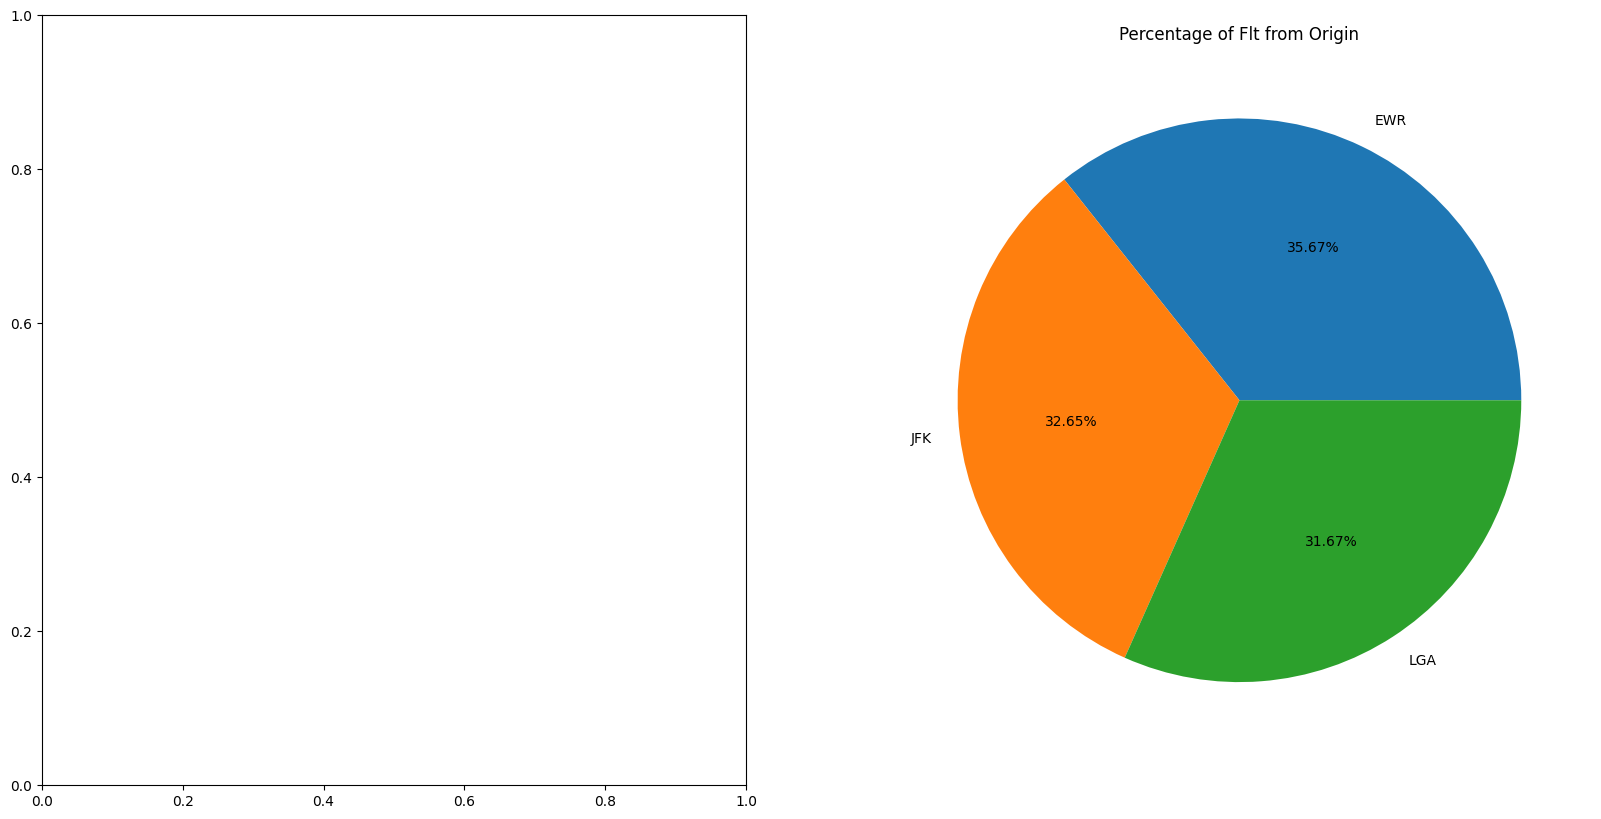

In [12]:
origin_count = flt_data_copy['origin'].value_counts()
f,ax=plt.subplots(1,2,figsize=(20,10))
flt_data_copy['origin'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)
ax[1].set_title('Percentage of Flt from Origin')
ax[1].set_ylabel('')
sns.countplot('origin',order = flt_data_copy['origin'].value_counts().index, data=flt_data_copy,ax=ax[0])
ax[0].set_title('Frequency Distribution of Flt from Origin')
ax[0].set_ylabel('Flight Count')
plt.show()

In [13]:
# Number of scheduled arrival at unique destination

Destination= flight_data['dest'].value_counts().sort_values(ascending=False).head(15)

Destination

ORD    3514
ATL    3458
BOS    3170
LAX    3166
CLT    2887
MCO    2791
SFO    2626
FLL    2465
MIA    2368
DCA    1986
DTW    1930
DFW    1831
RDU    1703
MSP    1509
TPA    1481
Name: dest, dtype: int64

TypeError: countplot() got multiple values for argument 'data'

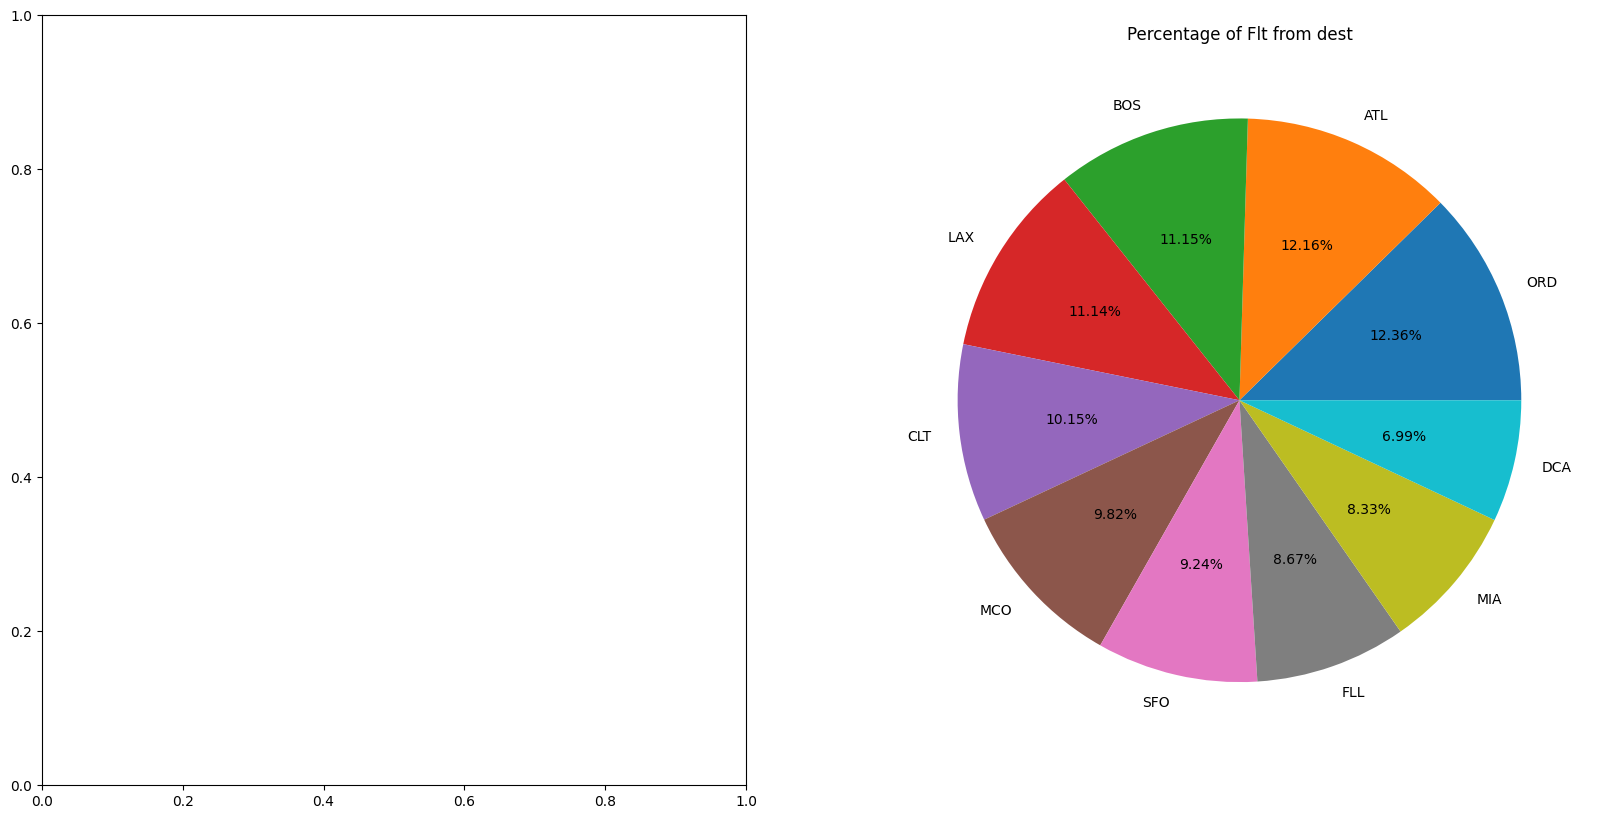

In [14]:
#Top10 destination flight from NYC in bar graph

f,ax=plt.subplots(1,2,figsize=(20,10))
flight_data['dest'].value_counts().head(10).sort_values(ascending=False).plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)
ax[1].set_title('Percentage of Flt from dest')
ax[1].set_ylabel('')
sns.countplot('dest',order = flight_data['dest'].sort_values(ascending=False).value_counts().head(10).index, data=flight_data,ax=ax[0])
ax[0].set_title('Frequency Distribution of Flt from dest')
ax[0].set_ylabel('Count by Flight_Destination ')
plt.show()

The top_10 destination flight from NYC are


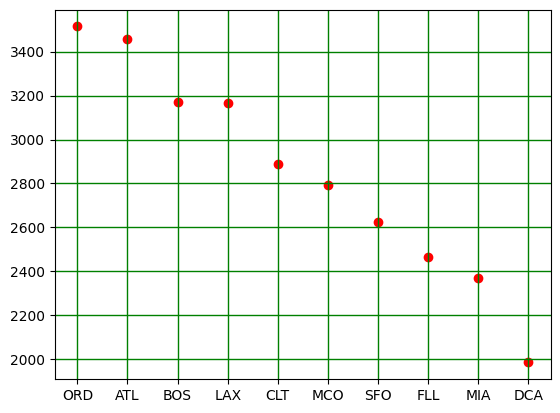

,dest,month
65,ORD,3514
3,ATL,3458
10,BOS,3170
47,LAX,3166
21,CLT,2887
50,MCO,2791
86,SFO,2626
33,FLL,2465
54,MIA,2368
26,DCA,1986


In [15]:
#Top10 destination flight from NYC

dest_count=flight_data.groupby(['dest'],as_index=False).agg({'month':'count'})
max_dest_count=dest_count.sort_values(['month'], ascending=False)
print("The top_10 destination flight from NYC are")
top_dest_flight = max_dest_count.head(10)
plt.scatter(top_dest_flight.dest,top_dest_flight.month, color='red')
plt.legend
plt.grid(True, color='g', linewidth=1)
plt.show()
top_dest_flight

In [16]:
#  Maximum number of flights headed to unique destination from Origin.

dest_flight = flight_data.groupby('origin')['dest'].value_counts()

dest_flight.head(10)

origin  dest
EWR     ORD     1213
        BOS     1093
        CLT      999
        MCO      998
        ATL      972
        SFO      924
        LAX      860
        IAH      804
        FLL      800
        DFW      671
Name: dest, dtype: int64

In [17]:
#Total number of unique Airline headed to BOS from NYC

BOS_dest=flight_data[flight_data['dest']=='BOS']
Carrier_count=(BOS_dest['carrier']).unique()

print("Carrier fly to BOS", Carrier_count)
print('\n')

print("Total number of Carrier  headed to 'BOS' from NYC is",len(Carrier_count))
print('\n')

BOS_dest_count=BOS_dest['tailnum'].unique()
print("Total unique aircraft  headed to 'BOS' from NYC is",len(BOS_dest_count))
print('\n')

Carrier fly to BOS ['B6' 'AA' 'DL' 'UA' 'US' '9E' 'EV']


Total number of Carrier  headed to 'BOS' from NYC is 7


Total unique aircraft  headed to 'BOS' from NYC is 769




Problem Statement _ Delay Information

In [18]:
# Avg. Monthly Departure Delay for Carrier

Monthly_Avg_Delay= flt_data_copy.groupby(['carrier','MONTH_desc'], axis=0, as_index=True).agg({'dep_delay':'mean'})
Monthly_Avg_Delay.head(15)

dep_delay
carrier MONTH_desc             
9E      01- January       16.58
        10- October        9.33
        11- November       5.72
AA      01- January        6.97
        10- October        2.97
        11- November       1.59
AS      01- January        7.35
        10- October        0.68
        11- November       7.23
B6      01- January        9.45
        10- October        2.95
        11- November       2.58
DL      01- January        3.79
        10- October        3.42
        11- November       2.01

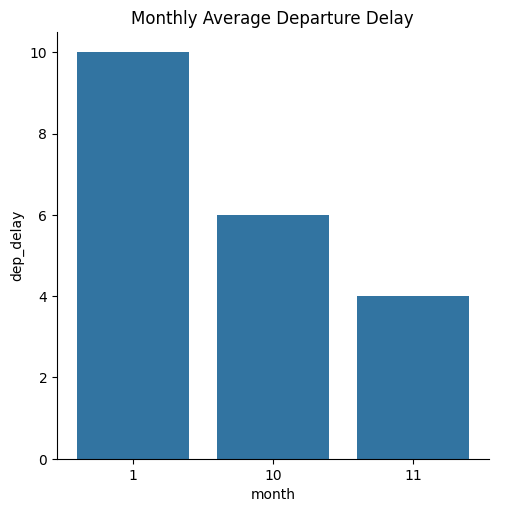

In [19]:
# Monthly Average Departure Departure Delay

monthly_delay = flight_data.groupby(['month'], as_index=False).agg({'dep_delay': 'mean'})
monthly_delay['dep_delay']=np.round(monthly_delay['dep_delay'],0)
sns.catplot(x='month', y='dep_delay',data=monthly_delay, kind='bar')
plt.title("Monthly Average Departure Delay")
plt.plot()
plt.show()

In [20]:
#Avg_arr_delay_sort by Carrier in 2013 (inclusive early arrival)

flt_data_copy.groupby('carrier').agg(np.size)
top_delay = flt_data_copy.groupby('carrier').agg({'arr_delay' :[np.size,np.mean]})


top_delay.sort_values([('arr_delay', 'mean')], ascending=False).head(16)

arr_delay      
             size  mean
carrier                
OO              3 43.00
F9            142 16.54
EV          10740 14.24
YV            122 11.06
FL            647 10.90
HA             63 10.40
MQ           5274  6.22
WN           2526  5.56
9E           3823  3.12
B6          10576  0.39
UA          11796  0.22
US           4130 -1.17
AA           6557 -1.42
DL           9450 -5.16
VX            969 -8.06
AS            146 -8.12

TypeError: barplot() got multiple values for argument 'data'

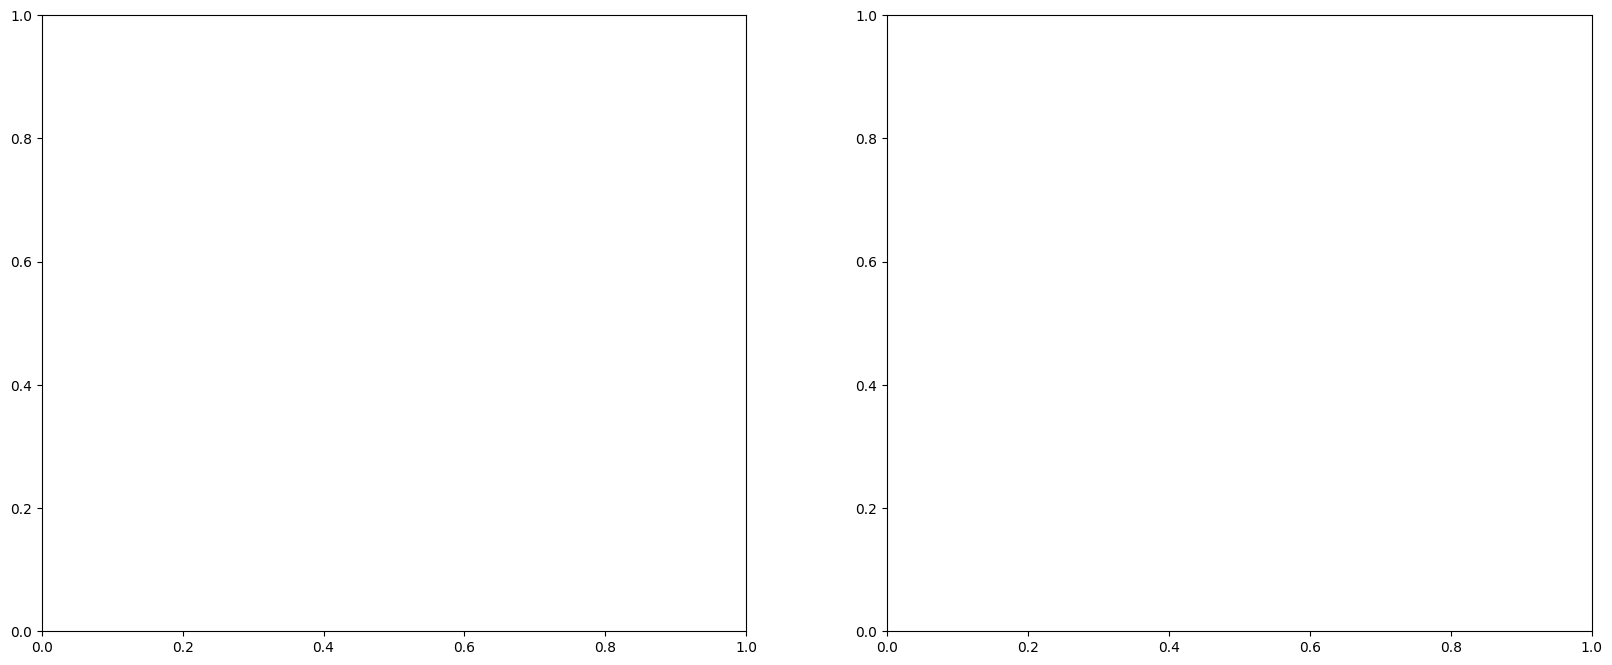

In [21]:
#Average arrival delay by carrier in 2013   (inclusive early arrival)

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('carrier','arr_delay', data=flt_data_copy,ax=ax[0], order=['F9', 'FL', 'EV', 'YV','OO','MQ','WN','B6',
                                                                                '9E','UA', 'US','VX','DL', 'AA','HA','AS'])

ax[0].set_title('Average Arrival Delay by Carrier')
sns.boxplot('carrier','arr_delay', data=flt_data_copy,ax=ax[1], order=['F9', 'FL', 'EV', 'YV','OO','MQ','WN','B6',
                                                                                '9E','UA', 'US','VX','DL', 'AA','HA','AS'])
ax[1].set_title('Delay Distribution by Carrier')
plt.close(2)
plt.show()

print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','US: US Airways','YV: Mesa Airlines', 'HA: Hawaiian Airlines',
       'EV: Atlantic Southeast Airlines','FL: AirTran Airways','F9: Frontier Airlines','VX: Virgin America',
       'B6: JetBlue Airways','9E: Pinnacle Airlines','AS: Alaska Airlines'])

In [22]:
#Avg_arr_delay_ for destination in 2013
flt_data_copy.groupby('dest').agg(np.size)                 # size() is calculating the count
airport_delay = flt_data_copy.groupby('dest').agg({'arr_delay' :[np.size,np.mean]})


airport_delay.sort_values([('arr_delay','mean')], ascending=False).head(10)

arr_delay      
          size  mean
dest                
CAE         20 53.65
EYW          1 45.00
TUL         63 41.49
OKC         66 37.91
SBN          2 34.50
ALB         81 28.32
GRR        164 21.00
OMA        178 20.19
MCI        372 18.04
MSN        142 16.91

In [23]:
#Top_10_arr_delay_for Destination with sample size>1000

top_arr_delay = airport_delay['arr_delay']['size'] >= 1000       # only variable with sample size >= 1000 will be considered

airport_delay[top_arr_delay].sort_values([('arr_delay', 'mean')], ascending=False)[:10]

arr_delay      
          size  mean
dest                
IAD       1199 11.15
BNA       1197  7.36
MSP       1481  6.27
RDU       1645  6.09
DEN       1426  5.19
DCA       1912  4.97
BUF       1020  4.54
ATL       3419  3.48
CLT       2842  3.47
ORD       3446  2.36

Problem Statement _ Ontime Departure & Arrival Analysis

<ipython-input-24-654765021e6c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_data_copy.loc[flt_data_copy['dep_delay'] <= 0, 'Status'] = 0


TypeError: countplot() got multiple values for argument 'data'

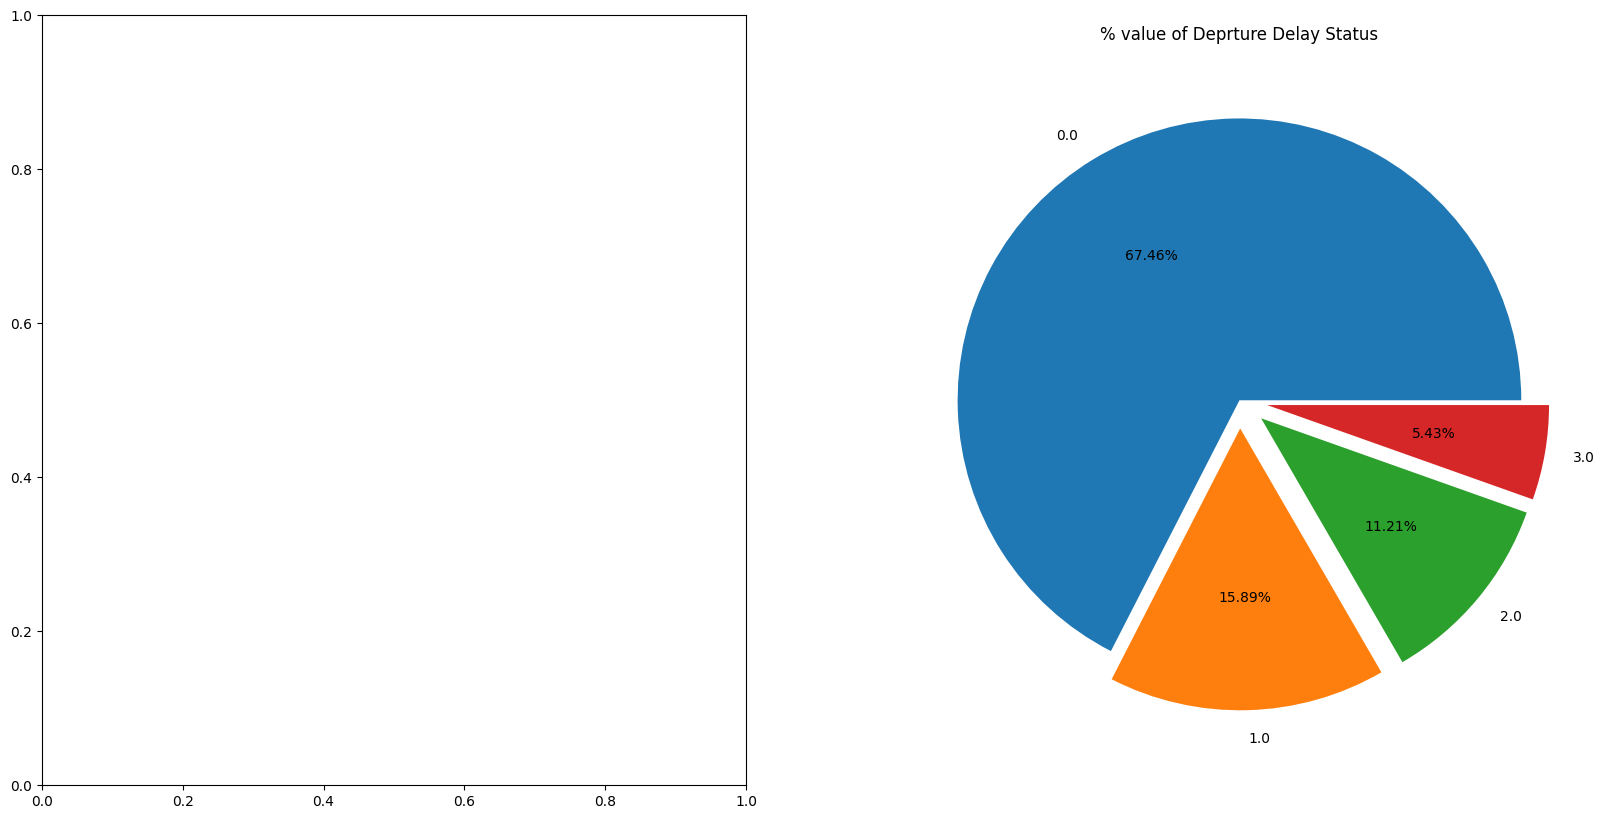

In [24]:
# Departure_Delay status classifications

flt_data_copy.loc[flt_data_copy['dep_delay'] <= 0, 'Status'] = 0
flt_data_copy.loc[flt_data_copy['dep_delay'] >= 1, 'Status'] = 1
flt_data_copy.loc[flt_data_copy['dep_delay'] >= 15, 'Status'] = 2
flt_data_copy.loc[flt_data_copy['dep_delay'] >= 60, 'Status'] = 3

# Departure_Delay_status_graph

f,ax=plt.subplots(1,2,figsize=(20,10))
flt_data_copy['Status'].value_counts().plot.pie(explode=[0,0.1,0.1,0.1],autopct='%1.2f%%',ax=ax[1],shadow=False)

ax[1].set_title('% value of Deprture Delay Status')
ax[1].set_ylabel('')
sns.countplot('Status',order = flt_data_copy['Status'].value_counts().index, data=flt_data_copy,ax=ax[0])
ax[0].set_title('Number of Departure Delay Status')
plt.show()

TypeError: countplot() got multiple values for argument 'data'

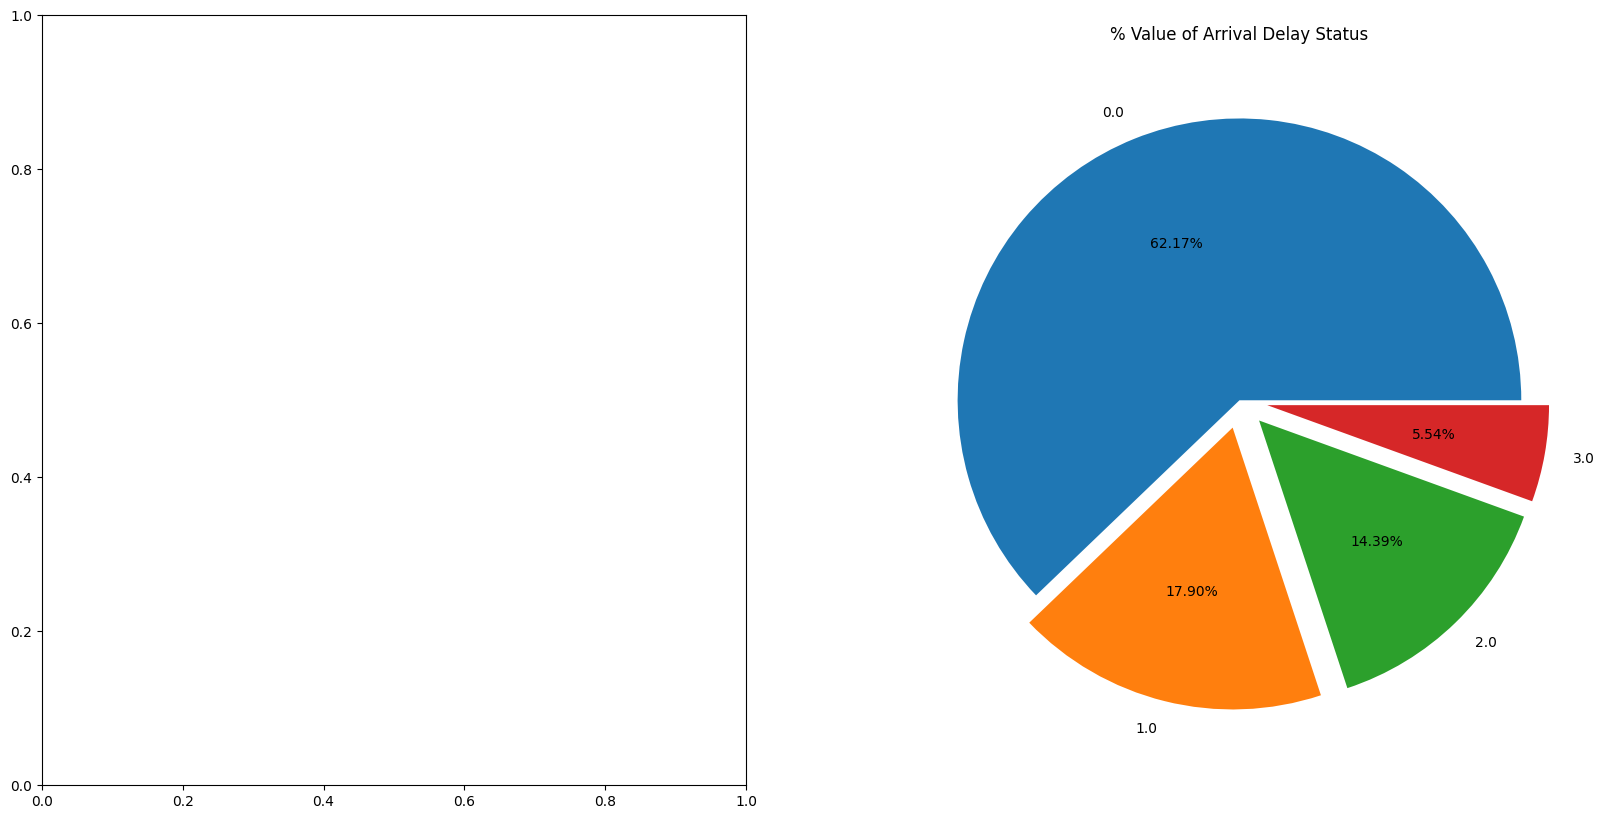

In [25]:
# Arrival_Delay status classification

flt_data_copy.loc[flt_data_copy['arr_delay'] <= 0, 'Status'] = 0
flt_data_copy.loc[flt_data_copy['arr_delay'] >= 1, 'Status'] = 1
flt_data_copy.loc[flt_data_copy['arr_delay'] >= 15, 'Status'] = 2
flt_data_copy.loc[flt_data_copy['arr_delay'] >= 60, 'Status'] = 3

## Arrival_delay_status_graph

f,ax=plt.subplots(1,2,figsize=(20,10))

flt_data_copy['Status'].value_counts().plot.pie(explode=[0,0.1,0.1,0.1],autopct='%1.2f%%',ax=ax[1],shadow=False)
ax[1].set_title('% Value of Arrival Delay Status')
ax[1].set_ylabel('')
sns.countplot('Status',order = flt_data_copy['Status'].value_counts().index, data=flt_data_copy,ax=ax[0])
ax[0].set_title('Number of Arrival Delay Status')
plt.show()

In [26]:
Delayedflights = flt_data_copy[(flt_data_copy.Status >= 1) &(flt_data_copy.Status <= 3)]

TypeError: barplot() got multiple values for argument 'data'

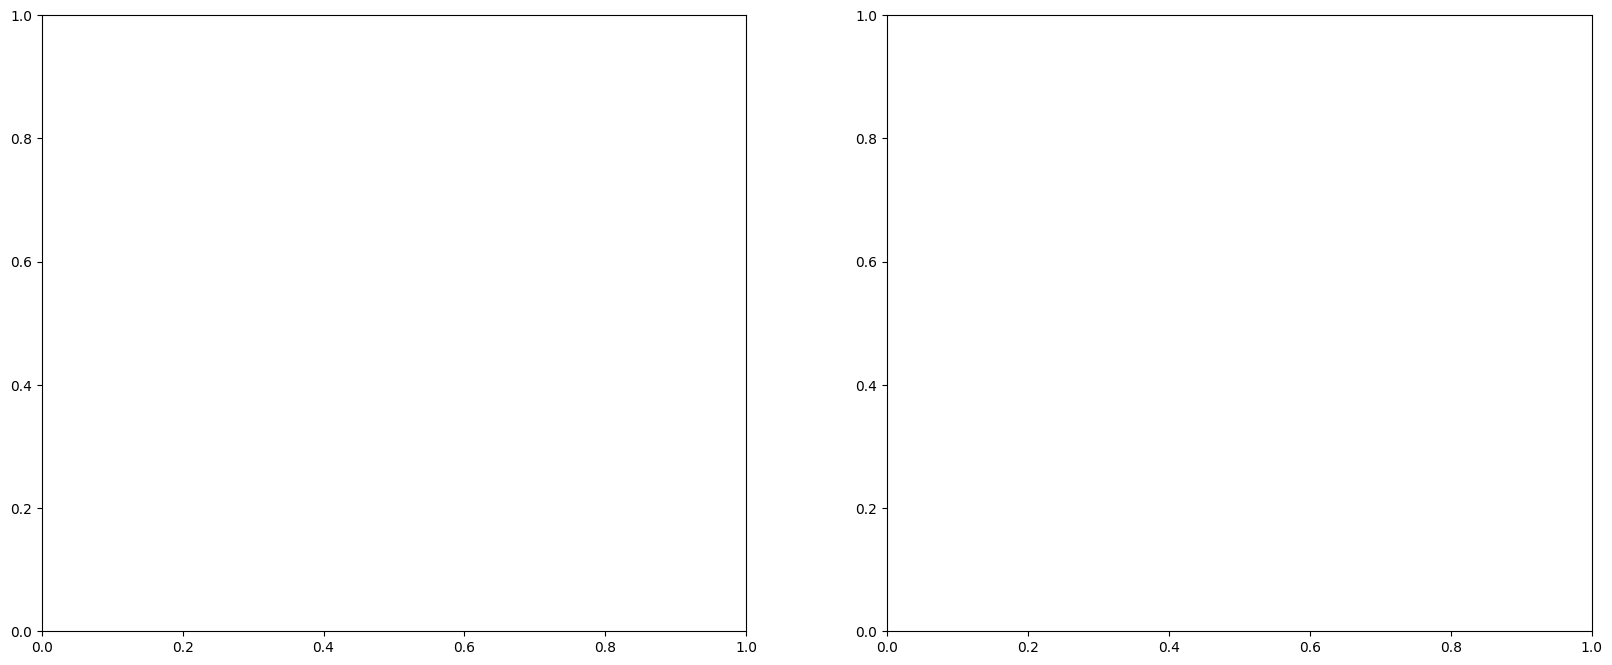

In [27]:
#Average arrival delay by carrier
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('carrier','arr_delay', data=Delayedflights,ax=ax[0], order=['F9', 'FL', 'EV', 'YV','OO','MQ','WN','B6',
                                                                                '9E','UA', 'US','VX','DL', 'AA','HA','AS'])

ax[0].set_title('Average Arrival Delay by Carrier')
sns.boxplot('carrier','arr_delay', data=Delayedflights,ax=ax[1], order=['F9', 'FL', 'EV', 'YV','OO','MQ','WN','B6',
                                                                                '9E','UA', 'US','VX','DL', 'AA','HA','AS'])
ax[1].set_title('Arrival Delay Distribution by Carrier')
plt.close(2)
plt.show()

print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','US: US Airways','YV: Mesa Airlines', 'HA: Hawaiian Airlines',
       'EV: Atlantic Southeast Airlines','FL: AirTran Airways','F9: Frontier Airlines','VX: Virgin America',
       'B6: JetBlue Airways','9E: Pinnacle Airlines','AS: Alaska Airlines'])

print('\n')
print('The top 5 US airline (American Airlines (AA), Southwest Airlines (WN), Delta Air Lines (DL), United Airlines (UA), Alaska Airlines (AS)generate an average delay of 37.2 minutes. Alaska Airlines, with an 34 minutes per flight, the second lowest of all the carriers.')
print('\n')
print('Carriers with higher average delay generation are Skywest Airlines(OO) with 60 minutes per flight,  Mesa Airlines (YV) with 50 minutes per flight, and Pinnacle Airlines (9E) with 49 minutes per flight. The error bar provide the insight that airlines with low number of flights having higher standard deviation distribution from the mean  (OO, HA, YV, F9, AS); so it seems like size matters.')
print('\n')
print('The boxplot shows, airlines with higher number of flights results having a higher chance of extreme waiting situation. American Eagle Airlines (MQ), American Airlines(AA), Delta Airline(DL) registered the maximum Carrier Delay for 2013 with an exception of Hawaiian Airlines (HA).')

TypeError: barplot() got multiple values for argument 'data'

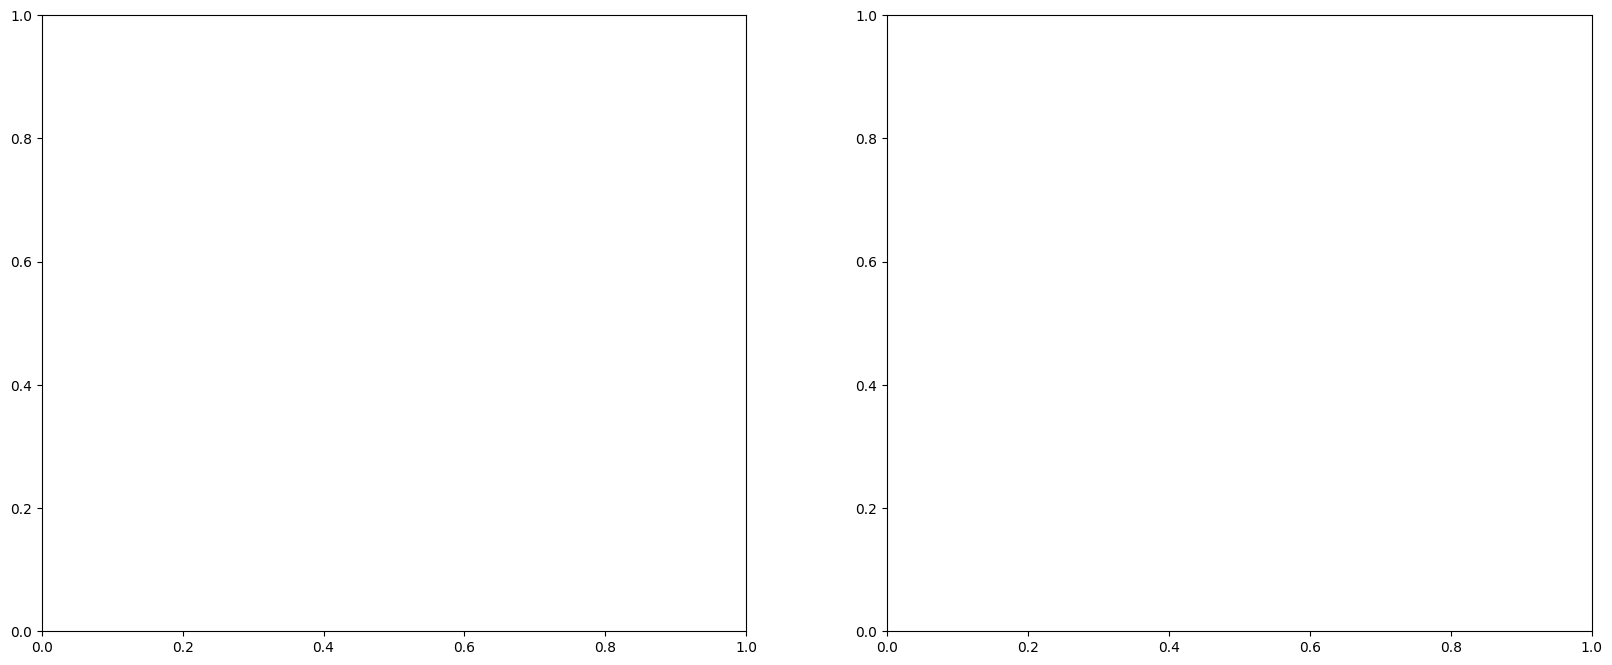

In [28]:
#Average departure delay by carrier

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('origin','dep_delay', data=Delayedflights,ax=ax[0], order=['EWR', 'JFK', 'LGA'])

ax[0].set_title('Airport Average Departure Delay')
sns.boxplot('origin','dep_delay', data=Delayedflights,ax=ax[1], order=['EWR', 'JFK', 'LGA'])
ax[1].set_title('Airport Delay Distribution')
plt.close(2)
plt.show()


print('There seems to be a correlation between the number of flights operated and departure delay. A descending pattern can be seen from barplot for average departure delay per flight. Considering, the assumption that JFK being a busiest airport among 3 due to international flights; so the maximum departure delay for 2013 is registered by JFK.')

Problem Statement _ Performance Analysis

In [29]:
scheduled_departure = flight_data.count()['sched_dep_time']
actual_departure = flight_data.count()['dep_time']
cancel_departure = scheduled_departure - actual_departure
ratio_oper = actual_departure / scheduled_departure * 100

ratio_cancel = 100 - ratio_oper

print("Sched_dep: ", scheduled_departure)
print("Operated: ", actual_departure)
print("Cancelled: ", cancel_departure)
print("\n")
print("Ratio operated flights over scheduled flights: %s" % ratio_oper)
print("Ratio of cancelled flights: %s" % ratio_cancel

SyntaxError: incomplete input (<ipython-input-29-db35c94ab80d>, line 13)

In [30]:
# The day and month having highest average delay departure by

Delay_Day=flt_data_copy.groupby(['day','month'], as_index=False).agg({'dep_delay': 'mean'})
Delay_Day_max=Delay_Day['dep_delay'].max()
Delay_Day_info=Delay_Day[Delay_Day['dep_delay']==Delay_Day_max]
print("The day and month having highest delay by average for departures" '\n' ,Delay_Day_info)

The day and month having highest delay by average for departures
     day  month  dep_delay
19    7     10      39.15


In [31]:
# The day and month having highest number of flight delay

max_flightdelay_day=flt_data_copy[flt_data_copy['dep_delay'] > 0].groupby(['day','month'], as_index=False).agg({'flight': 'count'})
max_flightdelay_info = max_flightdelay_day[max_flightdelay_day['flight'].max() == max_flightdelay_day['flight']]
print("Day and month which have highest number of flight delay" '\n' ,max_flightdelay_info)

Day and month which have highest number of flight delay
     day  month  flight
31   11     10     556


<ipython-input-32-bec5c4db835e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Delayedflights['arr_delay'], ax=ax[0])
<ipython-input-32-bec5c4db835e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Delayedflights['dep_delay'], ax=ax[1])


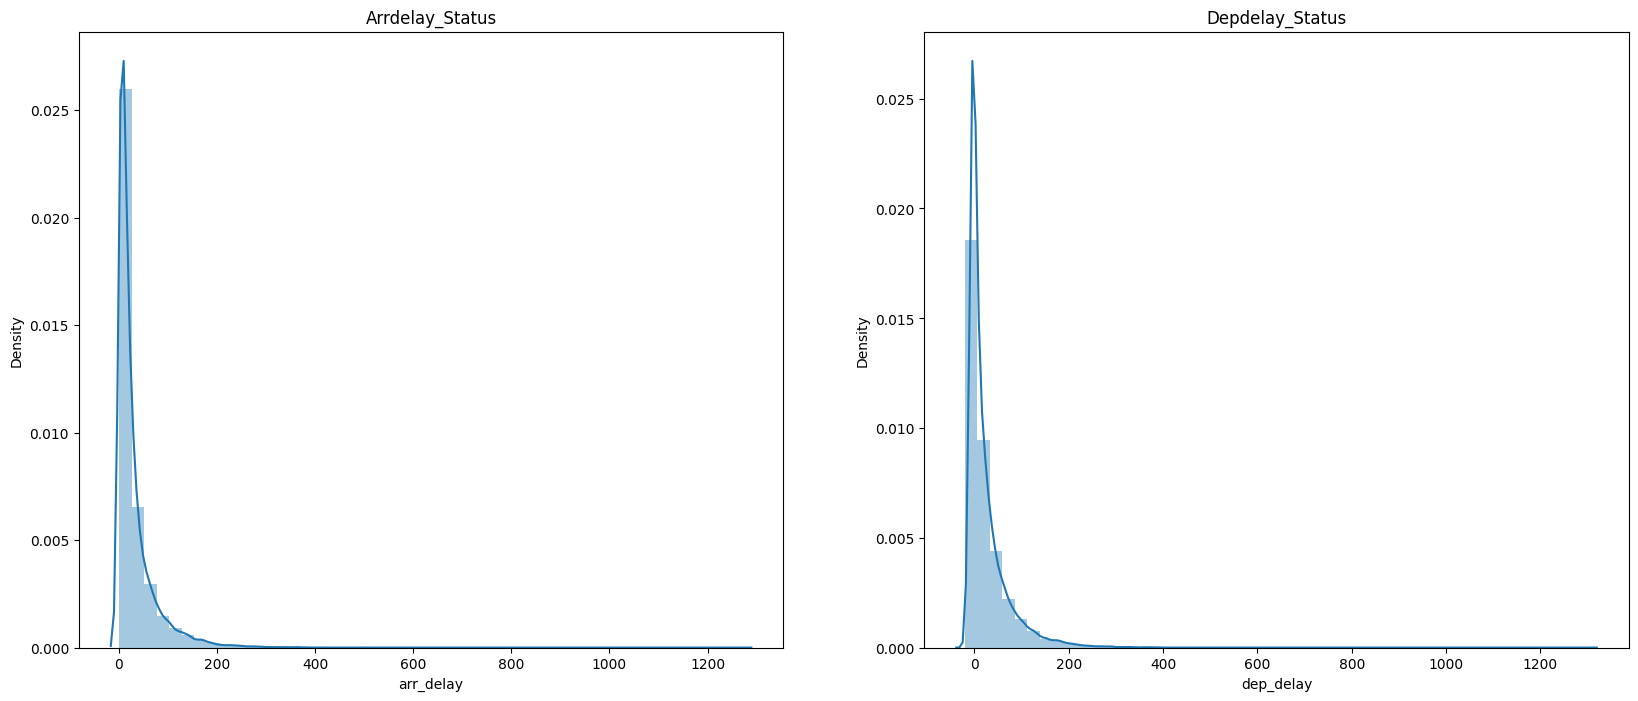

Skewness_arr: 4.909284
Kurtosis_arr: 65.305369
Skewness_dep: 4.365719
Kurtosis_dep: 53.566878


It can be seen on the histogram and by the skewness and kurtosis indexes, that the skewness is >1 which reflect the data distribution is highly positively skewed and Kurtosis>3 shows the leptokurtic distribution, having longer and fatter tail with a central peak higher and sharper.


The histogram shows the delays are mostly located on the left side of the graph, with a long tail to the right. The majority of delays are short, and the longer delays, while unusual, are more heavy loaded in time.


In [32]:
# histogram for arrival and departure delay

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(Delayedflights['arr_delay'], ax=ax[0])

ax[0].set_title('Arrdelay_Status')

sns.distplot(Delayedflights['dep_delay'], ax=ax[1])
ax[1].set_title('Depdelay_Status')
plt.show()

print("Skewness_arr: %f" % Delayedflights['arr_delay'].skew())
print("Kurtosis_arr: %f" % Delayedflights['arr_delay'].kurt())
print("Skewness_dep: %f" % Delayedflights['dep_delay'].skew())
print("Kurtosis_dep: %f" % Delayedflights['dep_delay'].kurt())
print('\n')
print('It can be seen on the histogram and by the skewness and kurtosis indexes, that the skewness is >1 which reflect the data distribution is highly positively skewed and Kurtosis>3 shows the leptokurtic distribution, having longer and fatter tail with a central peak higher and sharper.')
print('\n')
print('The histogram shows the delays are mostly located on the left side of the graph, with a long tail to the right. The majority of delays are short, and the longer delays, while unusual, are more heavy loaded in time.')

Top 5 destinations where flights arrives early than expected arrival time 



ValueError: could not convert string to float: 'SFO'

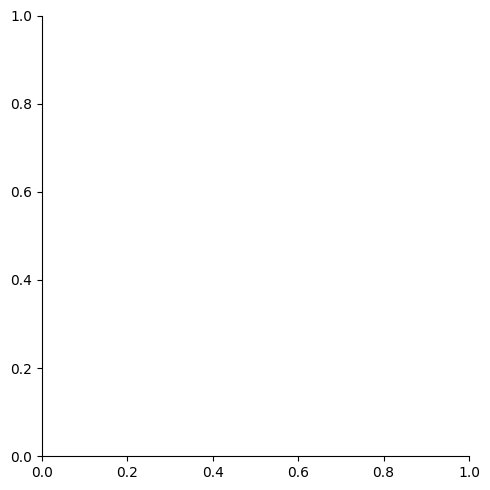

In [33]:
# Top5 destination where flight arrives early than expected arrival time

Ontime_Early_flights =flt_data_copy[(flt_data_copy.Status <= 0)]

top10flight=(Ontime_Early_flights.sort_values(['arr_delay'], ascending=True)).head(10)
top10flight_details=pd.DataFrame(top10flight, columns=['day','month','origin','dest','arr_delay','carrier','flight','tailnum','distance','flight_speed'])
print("Top 5 destinations where flights arrives early than expected arrival time",'\n')


sns.lmplot(x = 'dest', y='arr_delay', data = top10flight_details, fit_reg=False, hue="flight")

plt.grid(True, color='k')

plt.show()

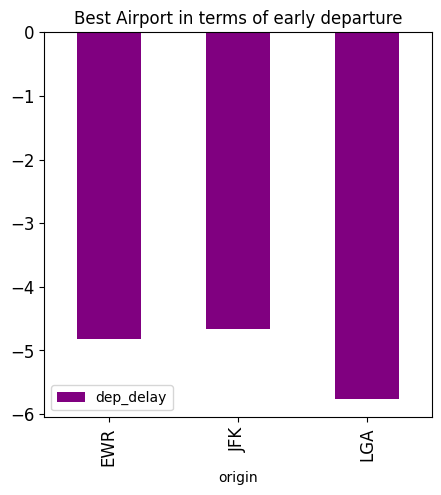

In [34]:
# Best airport in terms of early departure from NYC

airport_info = pd.DataFrame(flt_data_copy,columns=['day','month','dep_delay','arr_delay','carrier','origin','dest','flight'])
airport_origin = airport_info[airport_info['dep_delay']<0]
best_airport = airport_origin.sort_values(['dep_delay']).groupby(['origin']).agg({'dep_delay':'mean'})
best_airport.plot(kind='bar',color='purple', title ="Best Airport in terms of early departure",figsize=(5,5),legend=True, fontsize=12)
plt.show()
plt.close()

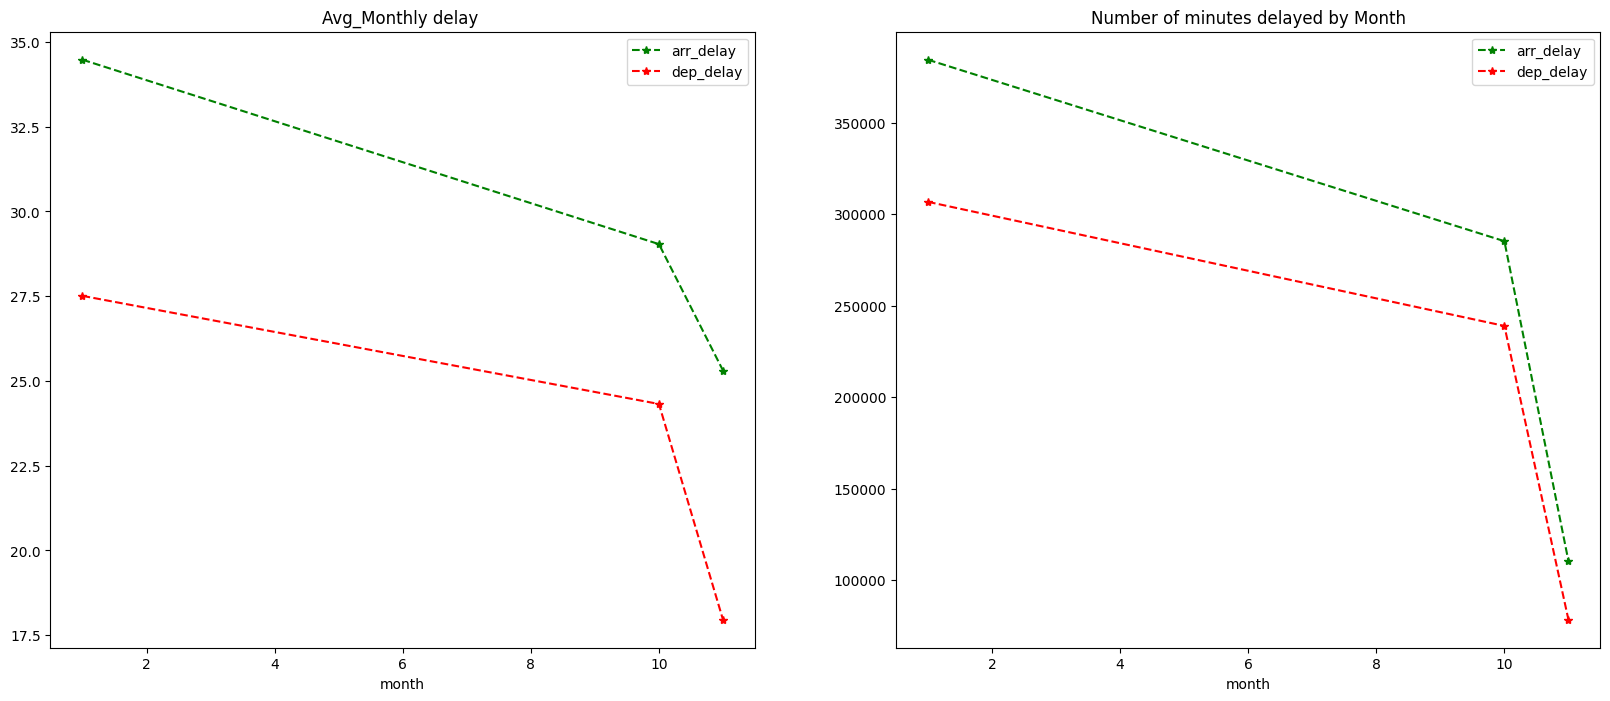

In [35]:
# Line Graph for Avg_Monthly delay of a/c  and Number of minutes delayed by month (excluding staus 0)
f,ax=plt.subplots(1,2,figsize=(20,8))
Delayedflights[['month','arr_delay','dep_delay']].groupby(['month']).mean().plot(ax=ax[0],marker='*', linestyle='dashed',color ='g'+'r')
ax[0].set_title('Avg_Monthly delay ')
Delayedflights[['month','arr_delay','dep_delay']].groupby(['month']).sum().plot(ax=ax[1], marker='*', linestyle='dashed',color ='g'+'r')
ax[1].set_title('Number of minutes delayed by Month')
plt.show()

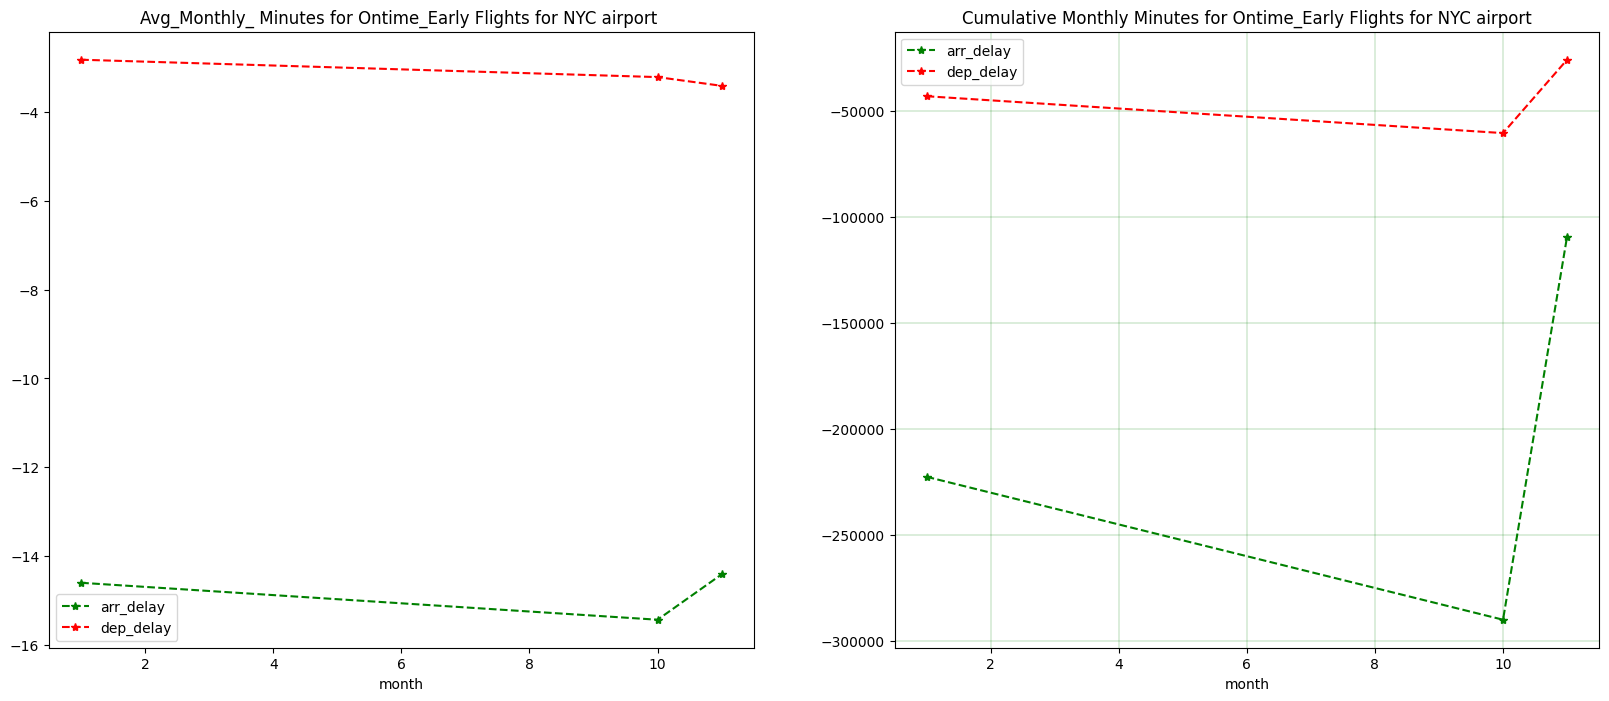

In [36]:
# Monthly_Delays of Ontime_Early_ Flights (only for status 0)

f,ax=plt.subplots(1,2,figsize=(20,8))
Ontime_Early_flights[['month','arr_delay','dep_delay']].groupby(['month']).mean().plot(ax=ax[0],marker='*', linestyle='dashed',color ='g'+'r')
ax[0].set_title('Avg_Monthly_ Minutes for Ontime_Early Flights for NYC airport ')


Ontime_Early_flights[['month','arr_delay','dep_delay']].groupby(['month']).sum().plot(ax=ax[1], marker='*', linestyle='dashed',color ='g'+'r')
ax[1].set_title('Cumulative Monthly Minutes for Ontime_Early Flights for NYC airport')
plt.grid(True, color='g',linewidth='0.2')
plt.show()

Problem Statement_ Aircraft Speed Analysis

In [37]:
# Flight Speed Analysis

flight_speed =flt_data_copy['distance'] / (flt_data_copy['air_time']/60)
flt_data_copy['flight_speed'] =flight_speed
flt_data_copy.sort_values(by='flight_speed', ascending=False).head(5)

<ipython-input-37-87fb24a34df0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_data_copy['flight_speed'] =flight_speed


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc,Status,flight_speed
10223,2013,1,12,1559.00,1600,-1.00,1849.00,1917,-28.00,DL,...,PBI,105.00,1035.00,16.00,0.00,2013-01-12T21:00:00Z,2013-01-12,01- January,0.00,591.43
59989,2013,11,5,1454.00,1455,-1.00,1913.00,1951,-38.00,DL,...,SJU,176.00,1598.00,14.00,55.00,2013-11-05T19:00:00Z,2013-11-05,11- November,0.00,544.77
24609,2013,1,29,1117.00,1125,-8.00,1535.00,1620,-45.00,DL,...,SJU,176.00,1598.00,11.00,25.00,2013-01-29T16:00:00Z,2013-01-29,01- January,0.00,544.77
60349,2013,11,5,2023.00,2030,-7.00,56.00,139,-43.00,DL,...,SJU,176.00,1598.00,20.00,30.00,2013-11-06T01:00:00Z,2013-11-05,11- November,0.00,544.77
24912,2013,1,29,1659.00,1700,-1.00,2138.00,2204,-26.00,DL,...,SJU,176.00,1598.00,17.00,0.00,2013-01-29T22:00:00Z,2013-01-29,01- January,0.00,544.77


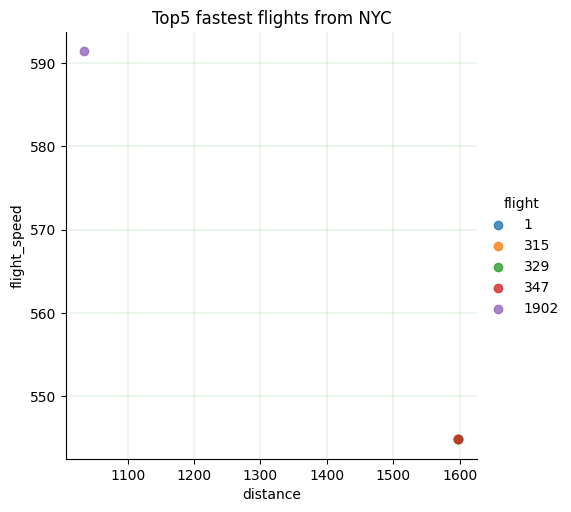

,flight,tailnum,distance,air_time,flight_speed
10223,1902,N956DL,1035.00,105.00,591.43
59989,1,N3749D,1598.00,176.00,544.77
24609,315,N3762Y,1598.00,176.00,544.77
60349,347,N718TW,1598.00,176.00,544.77
24912,329,N3766,1598.00,176.00,544.77


In [38]:
# Top5 fastest flights details from NYC

speed_5=flt_data_copy.loc[:, ['flight', 'tailnum','distance','air_time','flight_speed']].sort_values(by='flight_speed',ascending=False,axis=0).head(5)
sns.lmplot(x = 'distance', y='flight_speed', data = speed_5, fit_reg=False, hue="flight")
plt.grid(True, color='g', linewidth=0.1)
plt.title("Top5 fastest flights from NYC")
plt.show()
speed_5

In [39]:
Carrier_hmap=flt_data_copy.drop(['dep_time','sched_dep_time','arr_time','sched_arr_time','hour','minute','DATE',
                              'time_hour','month','year','origin','dest','tailnum','Status',
                                 'distance','flight','air_time'], axis=1)
Carrier_hmap.head()

,day,dep_delay,arr_delay,carrier,MONTH_desc,flight_speed
0,1,2.00,11.00,UA,01- January,370.04
1,1,4.00,20.00,UA,01- January,374.27
2,1,2.00,33.00,AA,01- January,408.38
3,1,-1.00,-18.00,B6,01- January,516.72
4,1,-6.00,-25.00,DL,01- January,394.14


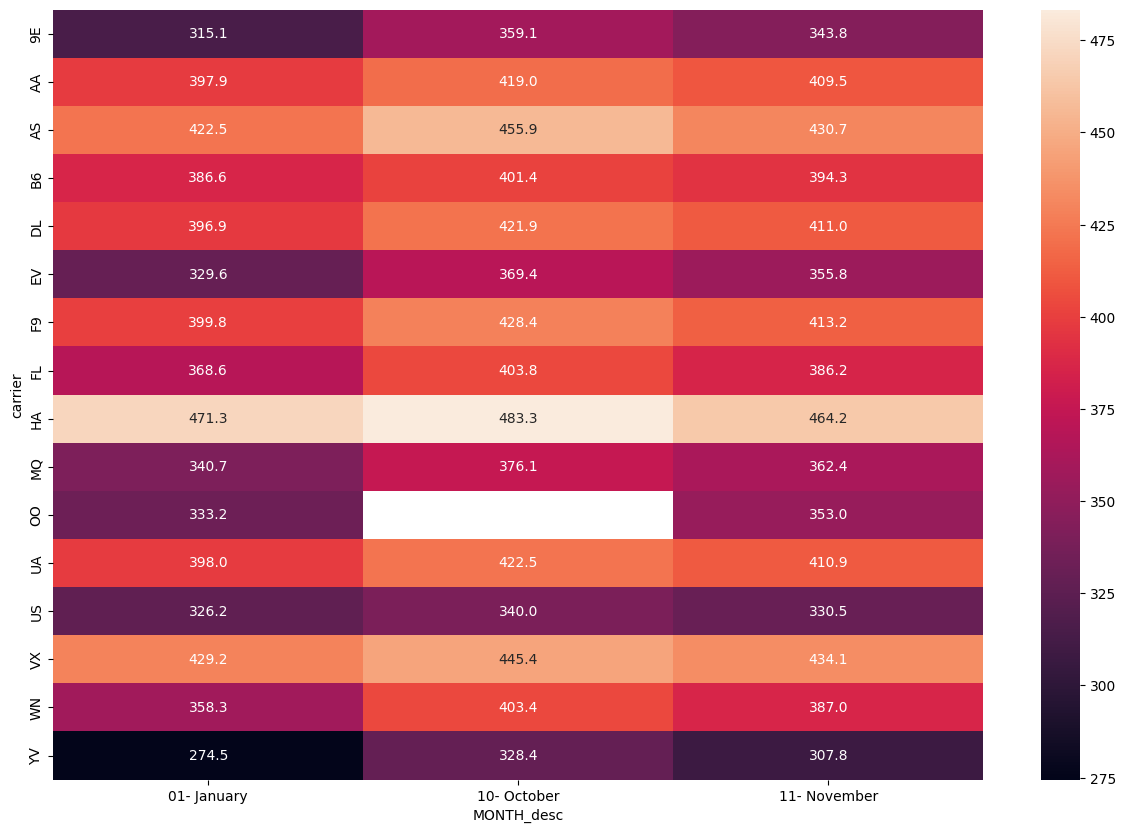

The peak season for air travel in USA is considered to be June to August  and lean season is mid of January to February. The airlines operate highest number of flights and carry maximum PAX load during the summer season and vis-à-vis during lean season. The data proves that the statement is true and most of the airlines having maximum departure between May to August and minimum between January to February. From, the heatmap, it is visible that during May to August most of the airlines tend to fly faster than normal flight speed, to cover maximum departure. Whereas, it is vis-à-vis during lean season.


In [40]:
Carrier_hmap_OO = pd.pivot_table(Carrier_hmap,values='flight_speed', aggfunc='mean', index='carrier',columns='MONTH_desc')
Carrier_hmap_OO.head()

plt.figure(figsize=(15,10))
sns.heatmap(Carrier_hmap_OO,annot=True, fmt=".1f")
plt.show()
print('The peak season for air travel in USA is considered to be June to August  and lean season is mid of January to February. The airlines operate highest number of flights and carry maximum PAX load during the summer season and vis-à-vis during lean season. The data proves that the statement is true and most of the airlines having maximum departure between May to August and minimum between January to February. From, the heatmap, it is visible that during May to August most of the airlines tend to fly faster than normal flight speed, to cover maximum departure. Whereas, it is vis-à-vis during lean season.')

KeyboardInterrupt: 

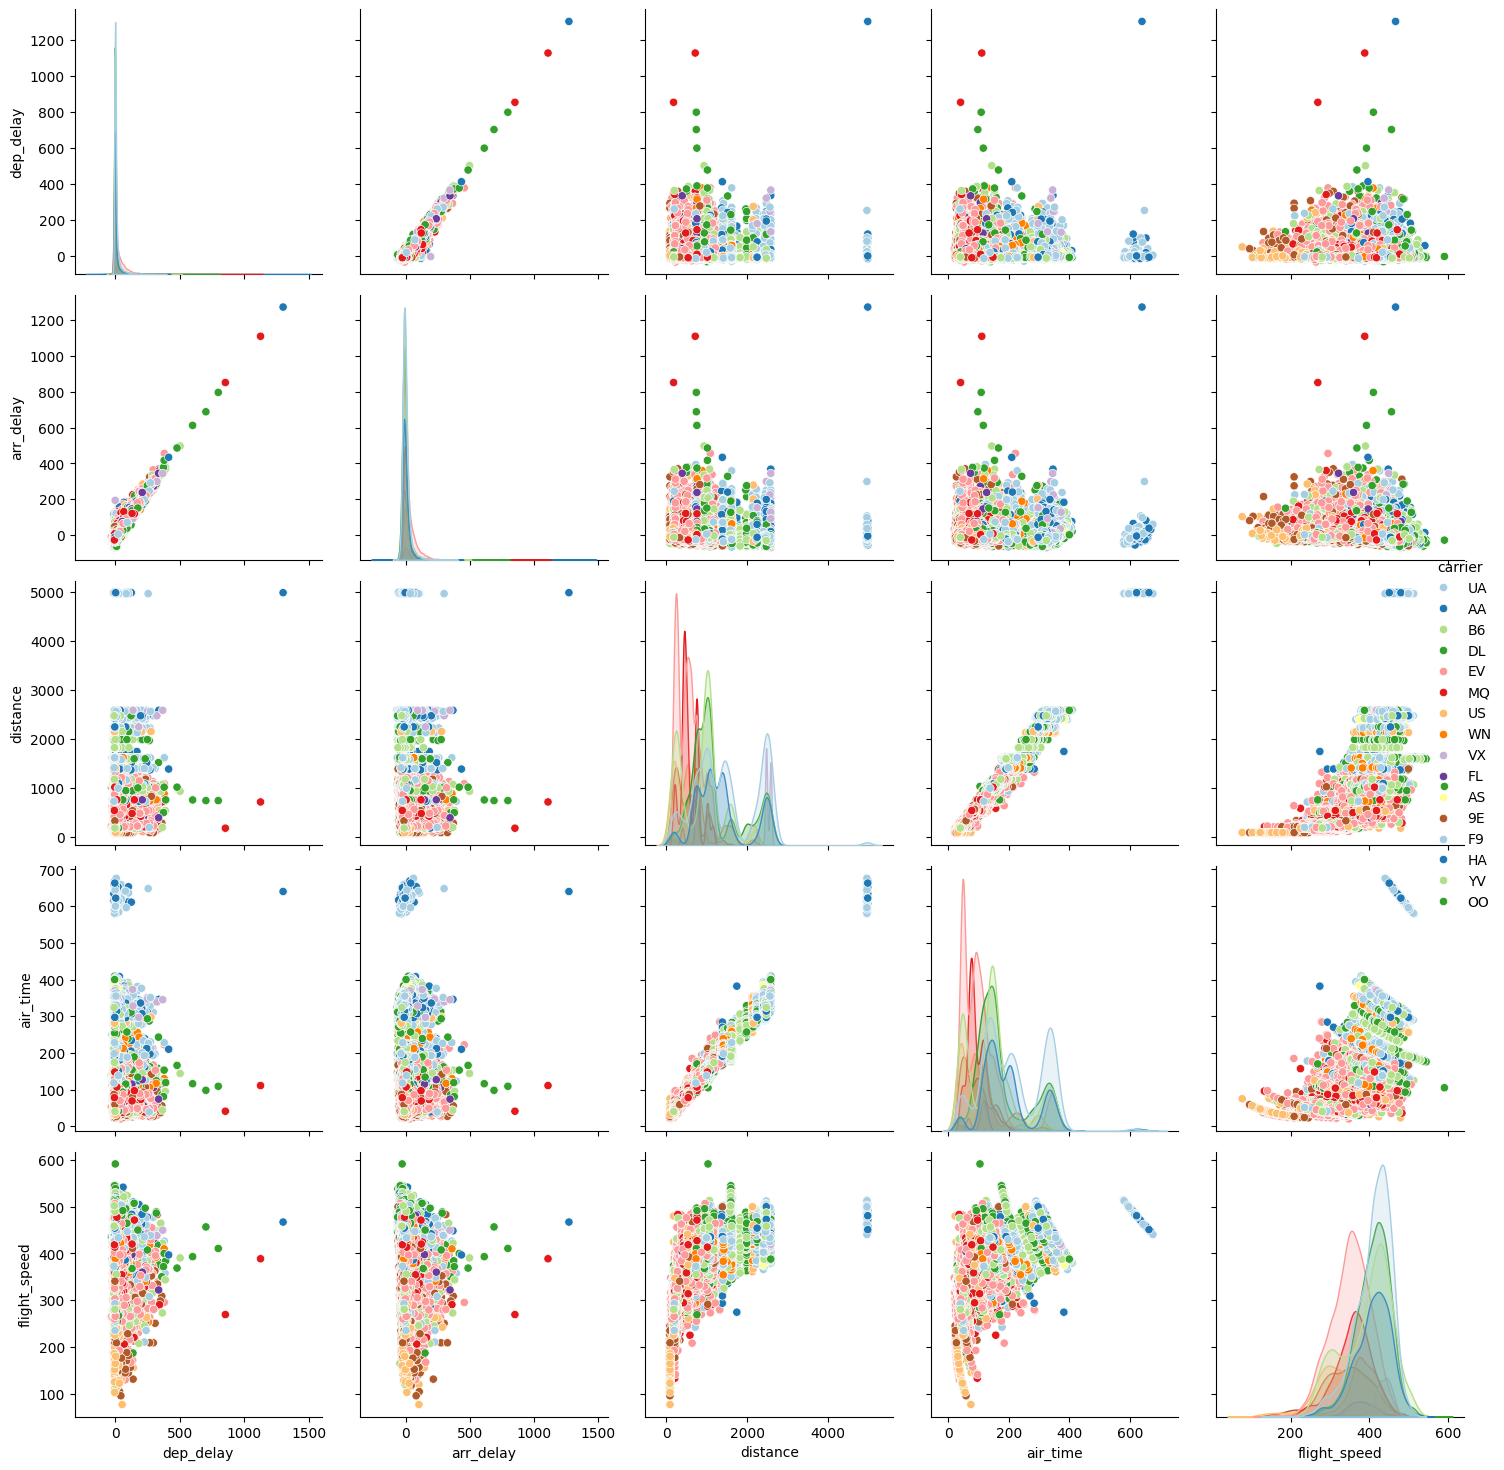

In [42]:
Airlines_info= sns.pairplot(flt_data_copy, height=3,
                            vars=['dep_delay','arr_delay','distance','air_time','flight_speed'], hue='carrier', palette="Paired")
plt.show(Airlines_info)

In [43]:
flt_corr= flt_data_copy.drop(['dep_time','sched_dep_time','arr_time','sched_arr_time','hour','minute',
                              'time_hour','DATE','MONTH_desc','year','flight'], axis=1)

<ipython-input-44-7f29e71a8dca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = flt_corr.corr()


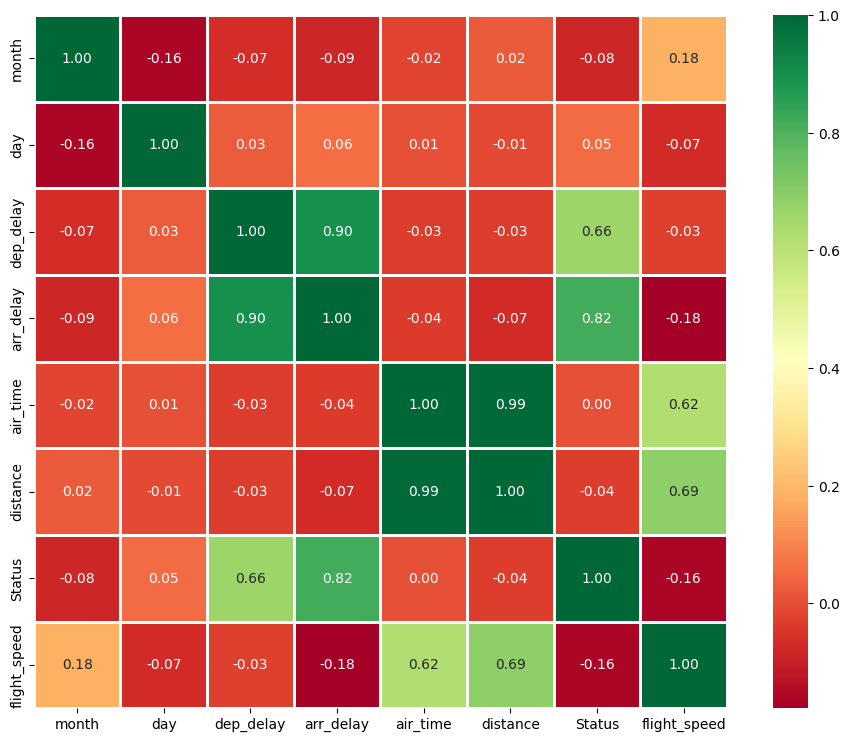

The coorelation matrix provide the result that the departure and arrival delay are positively and strongly coorelated. Similarly with air time and flight distance; So they tend to move in the same direction. Whereas  correlation between fightspeed, airtime, flightdistance are positive but not so strong enough to influence each other.


In [44]:
corrmat = flt_corr.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, square=True, cmap="RdYlGn",linewidth=1,annot=True,fmt='.2f');
plt.show()



print('The coorelation matrix provide the result that the departure and arrival delay are positively and strongly coorelated. Similarly with air time and flight distance; So they tend to move in the same direction. Whereas  correlation between fightspeed, airtime, flightdistance are positive but not so strong enough to influence each other.')